In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, MaxPool2D, SpatialDropout2D
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline

ImportError: cannot import name 'keras'

## Import data

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' ,'frog', 'horse','ship','truck']

## Data exploration

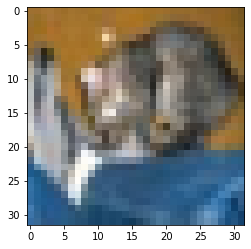

In [4]:
plt.imshow(X_test[0])

## Data preprocessing

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=1)
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((40000, 32, 32, 3),
 (40000, 1),
 (10000, 32, 32, 3),
 (10000, 1),
 (10000, 32, 32, 3),
 (10000, 1))

In [6]:
X_train=X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0

## Modeling

In [7]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='selu', input_shape=[32,32,3]))
model.add(BatchNormalization())
model.add(SpatialDropout2D(4/32))
model.add(MaxPool2D(2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='selu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(8/64))
model.add(MaxPool2D(2))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='selu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(16/128))
model.add(MaxPool2D(2))

model.add(Flatten())
model.add(Dense(units=128,activation='selu',kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(units=32,activation='selu',kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(units=10,activation='softmax'))

## about padding option: full, valid, same, check: https://www.cnblogs.com/sddai/p/10512784.html
## Between the conv and FC layer, there is a Flatten layer.
## Flatening transforms a 2D matrix of features into a vector that can be fed into FC NN classifier

In [8]:
model.summary()

# conv2d (Conv2D)              (None, 32, 32, 32)        896=3*3*3*32+32       
# _________________________________________________________________
# batch_normalization (BatchNo (None, 32, 32, 32)        128=32*4      
# _________________________________________________________________
# conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496=3*3*32*64+64     
# _________________________________________________________________
# batch_normalization_1 (Batch (None, 16, 16, 64)        256=64*4       
# _________________________________________________________________
# conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856=3*3*64*128+128     
# _________________________________________________________________
# batch_normalization_2 (Batch (None, 8, 8, 128)         512=128*4       
# _________________________________________________________________
# dense (Dense)                (None, 128)               262272=4*4*128*128+128    
# _________________________________________________________________
# dense_1 (Dense)              (None, 32)                4128=128*23+32      
# _________________________________________________________________
# dense_2 (Dense)              (None, 10)                330=32*10+10      

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 16, 16, 64)        0

In [9]:
opt=Adam(learning_rate=0.001)
epochs=64
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/64
40000/40000 [==============================] - 8s 207us/sample - loss: 4.1159 - sparse_categorical_accuracy: 0.3036 - val_loss: 2.9205 - val_sparse_categorical_accuracy: 0.3202
Epoch 2/64
40000/40000 [==============================] - 5s 125us/sample - loss: 2.1178 - sparse_categorical_accuracy: 0.4602 - val_loss: 1.5402 - val_sparse_categorical_accuracy: 0.5891
Epoch 3/64
40000/40000 [==============================] - 5s 126us/sample - loss: 1.5757 - sparse_categorical_accuracy: 0.5465 - val_loss: 1.3952 - val_sparse_categorical_accuracy: 0.6045
Epoch 4/64
40000/40000 [==============================] - 5s 126us/sample - loss: 1.3748 - sparse_categorical_accuracy: 0.5964 - val_loss: 1.1907 - val_sparse_categorical_accuracy: 0.6594_categorical_accuracy: 0.588 - ETA: 2s - loss: 1.4113 - ETA: 0s - loss: 1.3764 - sparse_categorical_accuracy: 0.59 - ETA: 0s - loss: 1.3758 - sparse_categorical_accuracy: 0
Epoch 5/64
40000/40000 [==

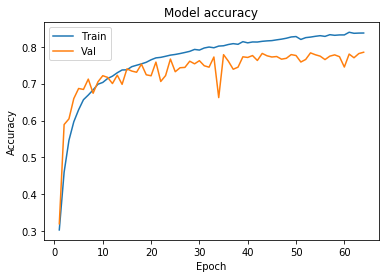

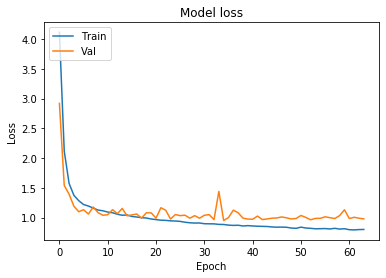

In [11]:
epoch_range=range(1,epochs+1)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()


## Evaluation

In [12]:
y_pred = model.predict_classes(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.7811

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24985f814a8>)

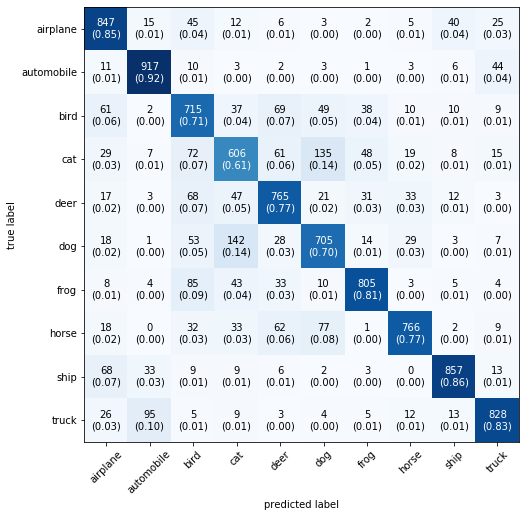

In [14]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8), class_names=class_name,show_normed=True)